# Human 3.6m
http://vision.imar.ro/human3.6m/description.php

This unreleased version of SpacePy is not supported by the SpacePy team.
---qq---
['Pose']
---qq---
(1231, 78)


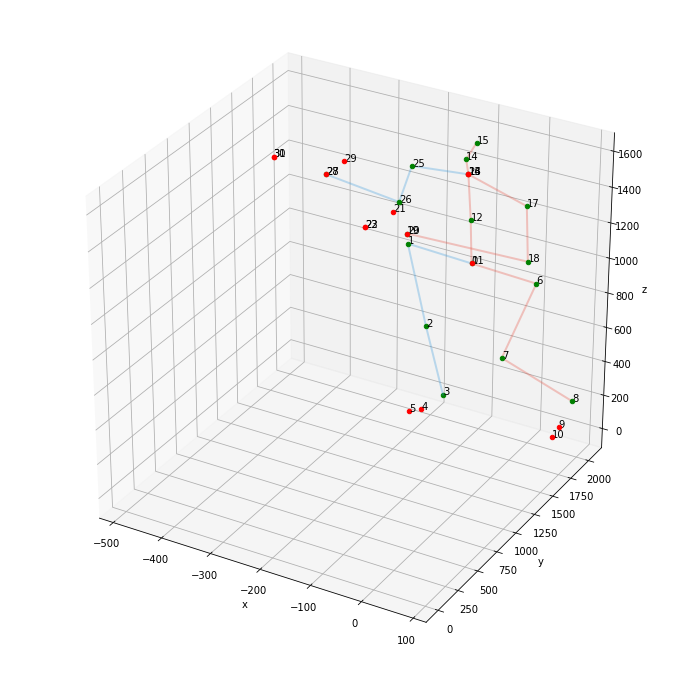

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import json; from pprint import pprint
Settings = json.load(open('settings.txt'))
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.insert(0,'../')
from os.path import isdir

root = Settings['h3.6m_root']

from pak.datasets.human36m import Human36m

data = Human36m(root)

angles = data.get_raw_angles('S1', 'WalkTogether')

print(angles.shape)

video = data.get_3d('S1', 'WalkTogether')

human = video[1000]


# =================================
def skeleton(ax, human, lcolor="#3498db", rcolor="#e74c3c", alpha=0.3):
    """ human = [32 x 3]
    """
    I = np.array([1, 2, 3, 1, 7, 8, 1, 13, 14, 15, 14, 18, 19, 14, 26, 27]) - 1
    J = np.array([2, 3, 4, 7, 8, 9, 13, 14, 15, 16, 18, 19, 20, 26, 27, 28]) - 1
    LR = np.array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1], dtype=bool)
    plots = []
    valid_3d_ids = set(I).union(set(J))
        
    vals = np.zeros((32, 3))
    for i in np.arange(len(I)):
        x = np.array([vals[I[i], 0], vals[J[i], 0]])
        y = np.array([vals[I[i], 1], vals[J[i], 1]])
        z = np.array([vals[I[i], 2], vals[J[i], 2]])
        plots.append(ax.plot(x, y, z, lw=2, c=lcolor if LR[i] else rcolor, alpha=alpha))
    
    vals = human
    for i in np.arange(len(I)):
        x = np.array([vals[I[i], 0], vals[J[i], 0]])
        y = np.array([vals[I[i], 1], vals[J[i], 1]])
        z = np.array([vals[I[i], 2], vals[J[i], 2]])
        plots[i][0].set_xdata(x)
        plots[i][0].set_ydata(y)
        plots[i][0].set_3d_properties(z)
        plots[i][0].set_color(lcolor if LR[i] else rcolor)
        
    
    for jid, (x, y, z) in enumerate(human):
        c = 'green' if jid in valid_3d_ids else 'red'
        ax.scatter(x, y, z, color=c)
        ax.text(x,y,z,str(jid))

# =================================


fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
#ax.set_aspect('equal')
# ax.set_xlim([-750, 750])
# ax.set_ylim([-1000, 500])
# ax.set_zlim([4800, 5800])

skeleton(ax, human)


plt.show()

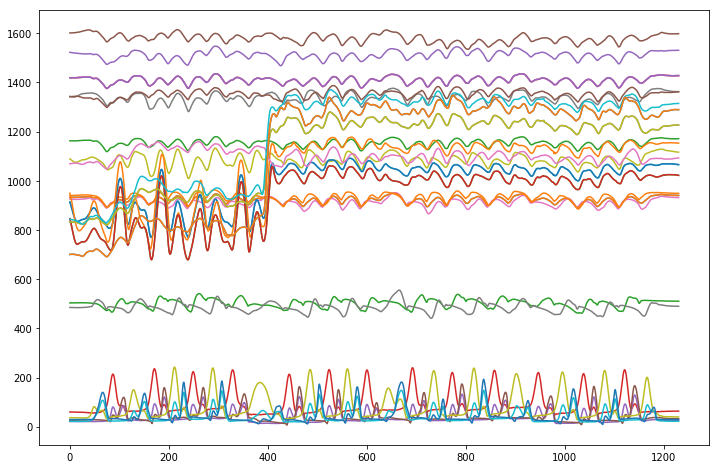

In [2]:
n, _, _ = video.shape

M = []
for f in range(n):
    pose = video[f]
    #min_y = min(pose[:, 1])
    min_y = pose[:, 2]
    M.append(min_y)
    
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
ax.plot(range(n), M)
plt.show()

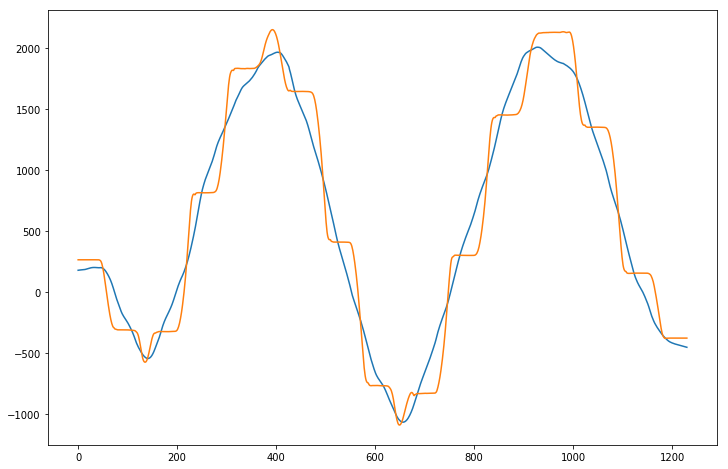

In [3]:
n, _, _ = video.shape

L = []
R = []
for f in range(n):
    pose = video[f]
    L.append(pose[17,1])
    R.append(pose[8,1])
    
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
ax.plot(range(n), L)
ax.plot(range(n), R)
plt.show()